In [296]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [297]:
train = pd.read_csv(r"C:\Users\User\Spaceship\train.csv")
test = pd.read_csv(r"C:\Users\User\Spaceship\test.csv")
ss = pd.read_csv(r"C:\Users\User\Spaceship\sample_submission.csv")

In [298]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [299]:
train.shape

(8693, 14)

In [300]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [301]:
test.shape

(4277, 13)

In [302]:
train.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [303]:
train['Transported'] = train['Transported'].map({False:int(0),True:int(1)})

In [304]:
train['Transported'].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Density'>

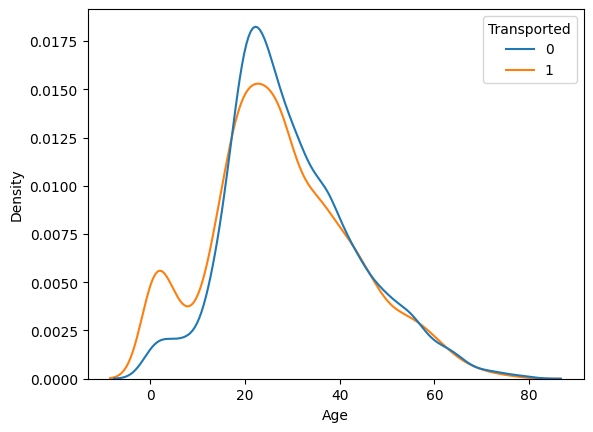

In [305]:
sns.kdeplot(data=train,x='Age',hue='Transported')

In [306]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot: xlabel='Destination', ylabel='Transported'>

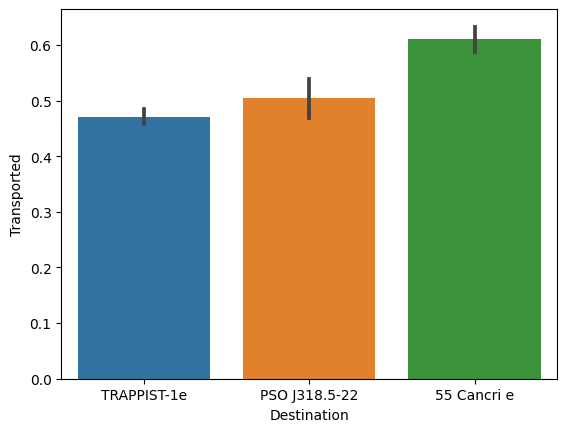

In [307]:
sns.barplot(data=train, x='Destination', y='Transported')

In [308]:
train['CryoSleep'] = train['CryoSleep'].map({False:int(0),True:int(1)})
test['CryoSleep'] = test['CryoSleep'].map({False:int(0),True:int(1)})

<AxesSubplot: xlabel='CryoSleep', ylabel='Transported'>

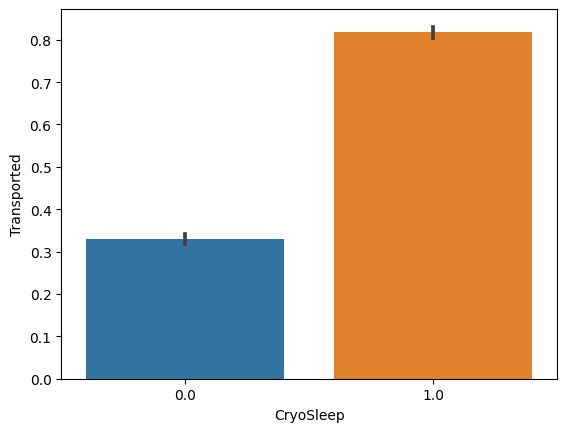

In [309]:
sns.barplot(data=train, x='CryoSleep',y='Transported')

In [310]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

<AxesSubplot: xlabel='HomePlanet', ylabel='Transported'>

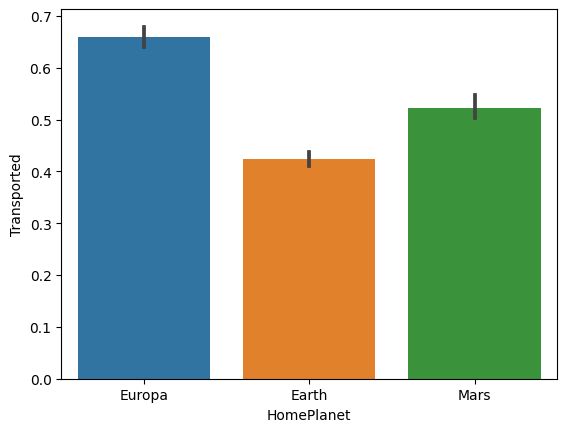

In [311]:
sns.barplot(data=train, x='HomePlanet',y='Transported')

In [312]:
combine = [pd.concat([train,test], axis=0).reset_index(drop=True)]
combine

[      PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
 0         0001_01     Europa        0.0     B/0/P    TRAPPIST-1e  39.0  False   
 1         0002_01      Earth        0.0     F/0/S    TRAPPIST-1e  24.0  False   
 2         0003_01     Europa        0.0     A/0/S    TRAPPIST-1e  58.0   True   
 3         0003_02     Europa        0.0     A/0/S    TRAPPIST-1e  33.0  False   
 4         0004_01      Earth        0.0     F/1/S    TRAPPIST-1e  16.0  False   
 ...           ...        ...        ...       ...            ...   ...    ...   
 12965     9266_02      Earth        1.0  G/1496/S    TRAPPIST-1e  34.0  False   
 12966     9269_01      Earth        0.0       NaN    TRAPPIST-1e  42.0  False   
 12967     9271_01       Mars        1.0   D/296/P    55 Cancri e   NaN  False   
 12968     9273_01     Europa        0.0   D/297/P            NaN   NaN  False   
 12969     9277_01      Earth        1.0  G/1498/S  PSO J318.5-22  43.0  False   
 
        RoomSe

In [313]:
train['VIP'] = train['VIP'].map({False:int(0),True:int(1)})
test['VIP'] = test['VIP'].map({False:int(0),True:int(1)})

In [314]:
cleaner = [train, test]

In [315]:
for dataset in cleaner:
    dataset['CryoSleep'].fillna(dataset['CryoSleep'].mode()[0], inplace=True)
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['RoomService'].fillna(dataset['RoomService'].median(), inplace=True)
    dataset['FoodCourt'].fillna(dataset['FoodCourt'].median(), inplace=True)
    dataset['ShoppingMall'].fillna(dataset['ShoppingMall'].median(), inplace=True)
    dataset['Spa'].fillna(dataset['Spa'].median(), inplace=True)
    dataset['VRDeck'].fillna(dataset['VRDeck'].median(), inplace=True)
    dataset['VIP'].fillna(dataset['VIP'].mode()[0], inplace=True)

In [316]:
for dataset in cleaner:
    dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode()[0], inplace=True)
    dataset['Destination'].fillna(dataset['Destination'].mode()[0], inplace=True)

In [317]:
#drop Name and Cabin
train.drop(['Name','Cabin'], axis=1,inplace=True)
test.drop(['Name','Cabin'], axis=1,inplace=True)

print(train.isnull().sum())
print("-"*10)
print(train.isnull().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
----------
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [318]:
for dataset in cleaner:
    dataset['TotalSpend'] = dataset['RoomService'] + dataset['FoodCourt'] + dataset['ShoppingMall'] + dataset['Spa'] + dataset['VRDeck']
    dataset['GroupID'] = dataset['PassengerId'].str.split("_", expand=True)[0]
    dataset['GroupNumber'] = dataset['PassengerId'].str.split("_", expand=True)[1]

In [319]:
column_drop = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train.drop(column_drop, axis=1, inplace=True)
test.drop(column_drop, axis=1, inplace=True)

In [320]:
train.drop(['GroupID', 'GroupNumber'], axis=1, inplace=True)
test.drop(['GroupID', 'GroupNumber'], axis=1, inplace=True)

In [321]:
for dataset in cleaner:
    dataset['GroupID'] = dataset['PassengerId'].str.split("_", expand=True)[0]
    dataset['GroupNumber'] = dataset['PassengerId'].str.split("_", expand=True)[1]

In [322]:
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
train['Group_size']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

train['Solo']=(train['Group_size']==1).astype(int)
test['Solo']=(test['Group_size']==1).astype(int)

In [323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8693 non-null   object 
 1   HomePlanet   8693 non-null   object 
 2   CryoSleep    8693 non-null   float64
 3   Destination  8693 non-null   object 
 4   Age          8693 non-null   float64
 5   VIP          8693 non-null   float64
 6   Transported  8693 non-null   int64  
 7   TotalSpend   8693 non-null   float64
 8   GroupID      8693 non-null   object 
 9   GroupNumber  8693 non-null   object 
 10  Group        8693 non-null   int32  
 11  Group_size   8693 non-null   int64  
 12  Solo         8693 non-null   int32  
dtypes: float64(4), int32(2), int64(2), object(5)
memory usage: 815.1+ KB


In [324]:
cl_drop = ['GroupID','GroupNumber','Group']
train.drop(cl_drop, axis=1, inplace=True)
test.drop(cl_drop, axis=1, inplace=True)

In [325]:
train.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
TotalSpend     0
Group_size     0
Solo           0
dtype: int64

In [326]:
test.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
TotalSpend     0
Group_size     0
Solo           0
dtype: int64

In [327]:
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalSpend,Group_size,Solo
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,1,1
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,1.0,736.0,1,1
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,0.0,10383.0,2,0
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,5176.0,2,0
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,1.0,1091.0,1,1


In [328]:
combine.isnull().sum().sort_values(ascending = False)

Transported    4277
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
TotalSpend        0
Group_size        0
Solo              0
dtype: int64

In [329]:
combine = pd.get_dummies(combine, columns = ['HomePlanet'])
combine = pd.get_dummies(combine, columns = ['Destination'])
combine.head()

,PassengerId,CryoSleep,Age,VIP,Transported,TotalSpend,Group_size,Solo,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0.0,39.0,0.0,0.0,0.0,1,1,0,1,0,0,0,1
1,0002_01,0.0,24.0,0.0,1.0,736.0,1,1,1,0,0,0,0,1
2,0003_01,0.0,58.0,1.0,0.0,10383.0,2,0,0,1,0,0,0,1
3,0003_02,0.0,33.0,0.0,0.0,5176.0,2,0,0,1,0,0,0,1
4,0004_01,0.0,16.0,0.0,1.0,1091.0,1,1,1,0,0,0,0,1


In [330]:
combine['Total_Band'] = pd.cut(combine['TotalSpend'], 4)
combine[['Total_Band', 'Transported']].groupby(['Total_Band'], as_index=False).mean().sort_values(by='Total_Band', ascending=False)

,Total_Band,Transported
3,"(26990.25, 35987.0]",0.363636
2,"(17993.5, 26990.25]",0.250000
1,"(8996.75, 17993.5]",0.306452
0,"(-35.987, 8996.75]",0.509220


In [331]:
combine.loc[combine['TotalSpend'] <= 8996.75, 'TotalSpend'] = 0
combine.loc[(combine['TotalSpend'] > 8996.75) & (combine['TotalSpend'] <= 17993.5), 'TotalSpend'] = 1
combine.loc[(combine['TotalSpend'] > 17993.5) & (combine['TotalSpend'] <= 26990.25), 'TotalSpend'] = 2
combine.loc[combine['TotalSpend'] > 26990.25, 'TotalSpend'] = 3

In [332]:
combine['TotalSpend'] = combine['TotalSpend'].astype('int')
combine['CryoSleep'] = combine['CryoSleep'].astype('int')
combine['VIP'] = combine['VIP'].astype('int')

In [333]:
combine = combine.drop(['Total_Band'], axis=1)

In [334]:
combine['Age_Band'] = pd.cut(combine['Age'], 4)
combine[['Age_Band', 'Transported']].groupby(['Age_Band'], as_index=False).mean().sort_values(by='Age_Band', ascending=False)

,Age_Band,Transported
3,"(59.25, 79.0]",0.468504
2,"(39.5, 59.25]",0.502181
1,"(19.75, 39.5]",0.466638
0,"(-0.079, 19.75]",0.588971


In [335]:
combine.loc[combine['Age'] <= 19.75, 'Age'] = 0
combine.loc[(combine['Age'] > 19.75) & (combine['Age'] <= 39.5), 'Age'] = 1
combine.loc[(combine['Age'] > 39.5) & (combine['Age'] <= 59.25), 'Age'] = 2
combine.loc[combine['Age'] > 59.25, 'Age'] = 3

In [336]:
combine = combine.drop(['Age_Band'], axis=1)
combine['Age'] = combine['Age'].astype('int')
combine

,PassengerId,CryoSleep,Age,VIP,Transported,TotalSpend,Group_size,Solo,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,1,0,0.0,0,1,1,0,1,0,0,0,1
1,0002_01,0,1,0,1.0,0,1,1,1,0,0,0,0,1
2,0003_01,0,2,1,0.0,1,2,0,0,1,0,0,0,1
3,0003_02,0,1,0,0.0,0,2,0,0,1,0,0,0,1
4,0004_01,0,0,0,1.0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,1,1,0,NaN,0,2,0,1,0,0,0,0,1
12966,9269_01,0,2,0,NaN,0,1,1,1,0,0,0,0,1
12967,9271_01,1,1,0,NaN,0,1,1,0,0,1,1,0,0
12968,9273_01,0,1,0,NaN,0,1,1,0,1,0,0,0,1


In [337]:
train = combine[:len(train)]
test = combine[len(train):]

In [338]:
train.head()
train['Transported'] = train['Transported'].astype('int')

In [339]:
train.head()

,PassengerId,CryoSleep,Age,VIP,Transported,TotalSpend,Group_size,Solo,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,1,0,0,0,1,1,0,1,0,0,0,1
1,0002_01,0,1,0,1,0,1,1,1,0,0,0,0,1
2,0003_01,0,2,1,0,1,2,0,0,1,0,0,0,1
3,0003_02,0,1,0,0,0,2,0,0,1,0,0,0,1
4,0004_01,0,0,0,1,0,1,1,1,0,0,0,0,1


In [340]:
test=test.drop(['Transported'],axis=1)
test.head()

,PassengerId,CryoSleep,Age,VIP,TotalSpend,Group_size,Solo,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
8693,0013_01,1,1,0,0,1,1,1,0,0,0,0,1
8694,0018_01,0,0,0,0,1,1,1,0,0,0,0,1
8695,0019_01,1,1,0,0,1,1,0,1,0,1,0,0
8696,0021_01,0,1,0,0,1,1,0,1,0,0,0,1
8697,0023_01,0,1,0,0,1,1,1,0,0,0,0,1


In [341]:
X_train = train.drop('Transported', axis = 1)
Y_train = train['Transported']
X_test = test.copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (8693, 13)
Y_train shape:  (8693,)
X_test shape:  (4277, 13)


In [342]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

50.36

In [343]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   4.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   4.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   4.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   4.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   4.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   4.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   4.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   4.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   4.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   4.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.504 total time=   5.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.472 total time=   5.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.498 total time=   5.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.503 total time=   5.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.498 total time=   5.3s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.496 total time=   5.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.485 total time=   6.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.458 total time=   5.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.479 total time=   5.7s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.497 total time=   5.4s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.496 total time=   5.8s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.485 total time=   5.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.458 total time=   5.3s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [344]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best estimator:  SVC(C=0.1, gamma=1)


In [345]:
svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

99.4

In [346]:
cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.46795590122085107

In [347]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [348]:
len(Y_pred)

4277

In [349]:
ss.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [350]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': Y_pred})
submit.head()

,PassengerId,Transported
8693,0013_01,0
8694,0018_01,0
8695,0019_01,0
8696,0021_01,0
8697,0023_01,0


In [351]:
submit['Transported'] = submit['Transported'].map({0:False,1:True})
submit.head()

,PassengerId,Transported
8693,0013_01,False
8694,0018_01,False
8695,0019_01,False
8696,0021_01,False
8697,0023_01,False


In [352]:
submit.to_csv(r"C:\Users\User\Spaceship\submit_spaceship.csv", index=False)